In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
pd.options.display.max_colwidth = 100

In [3]:
df = pd.read_csv("All Electronics.csv")
print(df.head()["image"])

0    https://m.media-amazon.com/images/I/81eM15lVcJL._AC_UL320_.jpg
1    https://m.media-amazon.com/images/I/71AvQd3VzqL._AC_UL320_.jpg
2    https://m.media-amazon.com/images/I/51UhwaQXCpL._AC_UL320_.jpg
3    https://m.media-amazon.com/images/I/81I3w4J6yjL._AC_UL320_.jpg
4    https://m.media-amazon.com/images/I/71V--WZVUIL._AC_UL320_.jpg
Name: image, dtype: object


In [4]:
df['discount_price'] = df['discount_price'].fillna(0)
df['discount_price'] = df['discount_price'].str.replace(',', '').str.replace('₹', '').astype(float)
# df1['Avg_Annual'] = df1['Avg_Annual'].str.replace(',', '').str.replace('$', '').astype(int)
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJL._AC_UL320_.jpg,https://www.amazon.in/Redmi-Power-Black-128GB-Storage/dp/B09Y64H8VS/ref=sr_1_4?qid=1679133649&s=...,4.0,965,10999.0,"₹18,999"
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3VzqL._AC_UL320_.jpg,https://www.amazon.in/OnePlus-Nord-Lite-128GB-Storage/dp/B09WQYFLRX/ref=sr_1_5?qid=1679133649&s=...,4.3,"113,956",18999.0,"₹19,999"
2,"OnePlus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Driver...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCpL._AC_UL320_.jpg,https://www.amazon.in/Oneplus-Bluetooth-Wireless-Earphones-Bombastic/dp/B09TVVGXWS/ref=sr_1_6?qi...,4.2,"90,304",1999.0,"₹2,299"
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM wit...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yjL._AC_UL320_.jpg,https://www.amazon.in/Samsung-Mystique-Storage-Purchased-Separately/dp/B09TWGDY4W/ref=sr_1_7?qid...,4.1,"24,863",15999.0,"₹24,999"
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUIL._AC_UL320_.jpg,https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_8?qid=1679133649&s...,4.3,"113,956",18999.0,"₹19,999"


In [5]:
df['actual_price'] = df['actual_price'].fillna(0)
df['actual_price'] = df['actual_price'].str.replace(',', '').str.replace('₹', '').astype(float)
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJL._AC_UL320_.jpg,https://www.amazon.in/Redmi-Power-Black-128GB-Storage/dp/B09Y64H8VS/ref=sr_1_4?qid=1679133649&s=...,4.0,965,10999.0,18999.0
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3VzqL._AC_UL320_.jpg,https://www.amazon.in/OnePlus-Nord-Lite-128GB-Storage/dp/B09WQYFLRX/ref=sr_1_5?qid=1679133649&s=...,4.3,"113,956",18999.0,19999.0
2,"OnePlus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Driver...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCpL._AC_UL320_.jpg,https://www.amazon.in/Oneplus-Bluetooth-Wireless-Earphones-Bombastic/dp/B09TVVGXWS/ref=sr_1_6?qi...,4.2,"90,304",1999.0,2299.0
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM wit...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yjL._AC_UL320_.jpg,https://www.amazon.in/Samsung-Mystique-Storage-Purchased-Separately/dp/B09TWGDY4W/ref=sr_1_7?qid...,4.1,"24,863",15999.0,24999.0
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUIL._AC_UL320_.jpg,https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_8?qid=1679133649&s...,4.3,"113,956",18999.0,19999.0


In [6]:
df['no_of_ratings'] = df['no_of_ratings'].fillna(0)
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '').str.replace('₹', '').str.replace('FREE Delivery by Amazon', '0').astype(float)
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJL._AC_UL320_.jpg,https://www.amazon.in/Redmi-Power-Black-128GB-Storage/dp/B09Y64H8VS/ref=sr_1_4?qid=1679133649&s=...,4.0,965.0,10999.0,18999.0
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3VzqL._AC_UL320_.jpg,https://www.amazon.in/OnePlus-Nord-Lite-128GB-Storage/dp/B09WQYFLRX/ref=sr_1_5?qid=1679133649&s=...,4.3,113956.0,18999.0,19999.0
2,"OnePlus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Driver...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCpL._AC_UL320_.jpg,https://www.amazon.in/Oneplus-Bluetooth-Wireless-Earphones-Bombastic/dp/B09TVVGXWS/ref=sr_1_6?qi...,4.2,90304.0,1999.0,2299.0
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM wit...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yjL._AC_UL320_.jpg,https://www.amazon.in/Samsung-Mystique-Storage-Purchased-Separately/dp/B09TWGDY4W/ref=sr_1_7?qid...,4.1,24863.0,15999.0,24999.0
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUIL._AC_UL320_.jpg,https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_8?qid=1679133649&s...,4.3,113956.0,18999.0,19999.0


In [7]:
df['ratings'] = df['ratings'].fillna(0)
df['ratings'] = df['ratings'].str.replace(',', '').str.replace('₹', '').str.replace('Get', '0').astype(float)
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJL._AC_UL320_.jpg,https://www.amazon.in/Redmi-Power-Black-128GB-Storage/dp/B09Y64H8VS/ref=sr_1_4?qid=1679133649&s=...,4.0,965.0,10999.0,18999.0
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3VzqL._AC_UL320_.jpg,https://www.amazon.in/OnePlus-Nord-Lite-128GB-Storage/dp/B09WQYFLRX/ref=sr_1_5?qid=1679133649&s=...,4.3,113956.0,18999.0,19999.0
2,"OnePlus Bullets Z2 Bluetooth Wireless in Ear Earphones with Mic, Bombastic Bass - 12.4 Mm Driver...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCpL._AC_UL320_.jpg,https://www.amazon.in/Oneplus-Bluetooth-Wireless-Earphones-Bombastic/dp/B09TVVGXWS/ref=sr_1_6?qi...,4.2,90304.0,1999.0,2299.0
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM wit...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yjL._AC_UL320_.jpg,https://www.amazon.in/Samsung-Mystique-Storage-Purchased-Separately/dp/B09TWGDY4W/ref=sr_1_7?qid...,4.1,24863.0,15999.0,24999.0
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUIL._AC_UL320_.jpg,https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_8?qid=1679133649&s...,4.3,113956.0,18999.0,19999.0


In [8]:
df.shape

(9600, 9)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


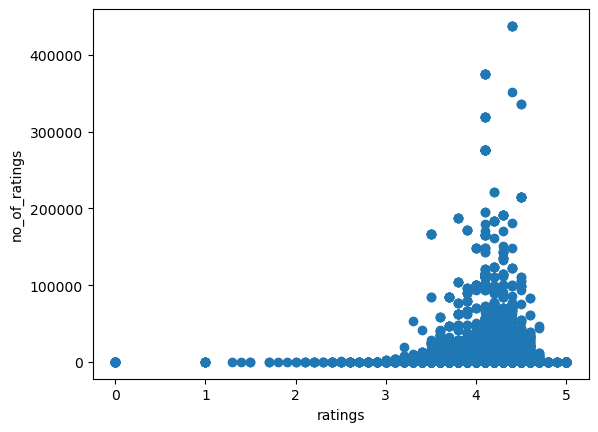

In [9]:
plt.scatter(df['ratings'],df['no_of_ratings'])
plt.xlabel('ratings')
plt.ylabel('no_of_ratings')
print(type(df['ratings']), type(df['no_of_ratings']))

In [10]:
df['ratings'] = df['ratings'].fillna(0)
df['no_of_ratings'] = df['no_of_ratings'].fillna(0)
df['discount_price'] = df['discount_price'].fillna(0)
df['actual_price'] = df['actual_price'].fillna(0)

In [11]:
scaler = MinMaxScaler()

scaler.fit(df[['ratings']])
df['ratings'] = scaler.transform(df[['ratings']])

scaler.fit(df[['no_of_ratings']])
df['no_of_ratings'] = scaler.transform(df[['no_of_ratings']])

scaler.fit(df[['discount_price']])
df['discount_price'] = scaler.transform(df[['discount_price']])

scaler.fit(df[['actual_price']])
df['actual_price'] = scaler.transform(df[['actual_price']])

In [12]:

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['ratings', 'no_of_ratings', 'discount_price', 'actual_price']])
    sse.append(km.inertia_)

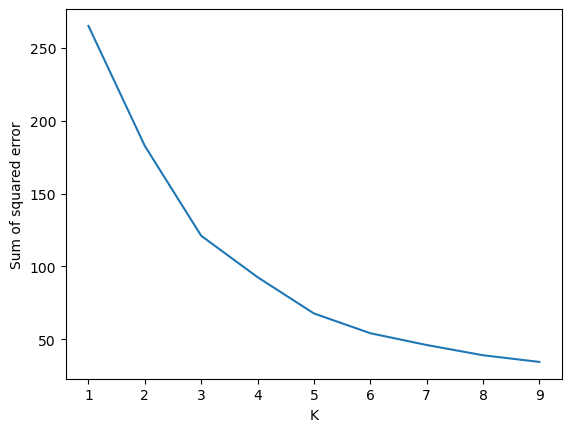

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [14]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['ratings', 'no_of_ratings', 'discount_price', 'actual_price']])
y_predicted

array([0, 4, 4, ..., 3, 3, 0])

In [15]:
df['cluster']=y_predicted
df = df.sort_values(by=['cluster'])
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,cluster
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJL._AC_UL320_.jpg,https://www.amazon.in/Redmi-Power-Black-128GB-Storage/dp/B09Y64H8VS/ref=sr_1_4?qid=1679133649&s=...,0.80,0.002205,0.081475,0.117279,0
5651,rts RFID Blocking Credit Card Holder Credit/Debit/ATM/Business Visiting Name Wallet ID Protector...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/61VC1RoGEXL._AC_UL320_.jpg,https://www.amazon.in/rts-Card-Holder-Magnetic-Visiting/dp/B0832P2FRN/ref=sr_1_5654?qid=16791340...,0.88,0.001008,0.001696,0.012340,0
5650,Spigen Sand Blast Back Cover Case Compatible with Samsung Galaxy A23 LTE and A23 5G (TPU | Matte...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81MrQoCN5VL._AC_UL320_.jpg,https://www.amazon.in/Spigen-Blast-Compatible-Samsung-Galaxy/dp/B0BQLYQYS1/ref=sr_1_5653?qid=167...,0.88,0.000018,0.004437,0.004932,0
5649,TheGiftKart Rugged Carbon Fibre TPU Armor Back Cover Case for Samsung Galaxy M21 / M21 2021 Edit...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/61+OXNKZKrL._AC_UL320_.jpg,https://www.amazon.in/TheGiftKart-Samsung-Galaxy-M21-M30s/dp/B07Y1YG8W1/ref=sr_1_5652?qid=167913...,0.88,0.007732,0.002215,0.006167,0
5648,"Western Digital WD 4TB My Passport Portable Hard Disk Drive,Compatible with Windows and Mac, Ext...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51CDEElxPFL._AC_UL320_.jpg,https://www.amazon.in/Passport-Portable-External-Drive-Black/dp/B07VTW2LPX/ref=sr_1_5651?qid=167...,0.88,0.170362,0.064438,0.069136,0


In [16]:
km.cluster_centers_

array([[8.52726979e-01, 1.41544607e-02, 1.20529885e-02, 1.98469722e-02],
       [8.37209302e-01, 1.05950788e-02, 3.03394520e-01, 3.73664319e-01],
       [2.82089552e-02, 8.86687570e-07, 2.36194674e-02, 3.75115638e-02],
       [7.31694977e-01, 9.18331689e-03, 1.04229877e-02, 1.79679182e-02],
       [8.32403846e-01, 3.66246109e-01, 1.46254274e-02, 2.23011793e-02]])

In [17]:
df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'cluster'],
      dtype='object')

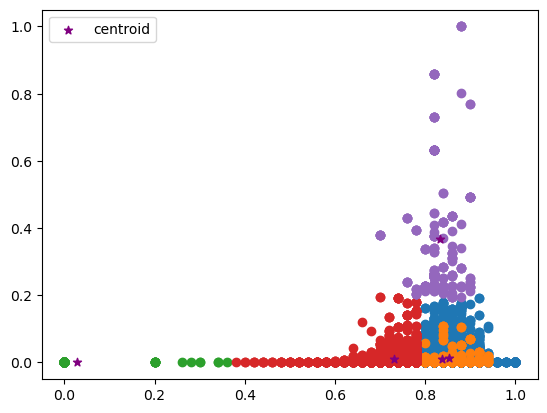

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1['ratings'],df1['no_of_ratings'])
plt.scatter(df2['ratings'],df2['no_of_ratings'])
plt.scatter(df3['ratings'],df3['no_of_ratings'])
plt.scatter(df4['ratings'],df4['no_of_ratings'])
plt.scatter(df5['ratings'],df5['no_of_ratings'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [19]:
km


KMeans(n_clusters=5)

In [20]:
dataframe = pd.DataFrame()
dataframe['kmean'] = km.labels_
dataframe['kmean'].value_counts()

0    6190
3    2767
1     301
4     208
2     134
Name: kmean, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df[['ratings','no_of_ratings', 'discount_price', 'actual_price']]
y = df.cluster

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X, y)
print(knn.score(X_test, y_test))
print(knn.predict([[df.iloc[9500][5],df.iloc[9500][6],df.iloc[9500][7],df.iloc[9500][8]]]))
print(df.iloc[3707][9])

0.9989583333333333
[4]
0


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change

In [25]:
def recommend_product(product):
    product_detail = df[df['name'] == product]
    
    c = knn.predict([[product_detail.iloc[0][5],product_detail.iloc[0][5],product_detail.iloc[0][5],product_detail.iloc[0][5]]])[0]
#     print(product_detail.iloc[0][5], c)
#     print(df[df['cluster'] == c].head())
    return df[df['cluster'] == c].head()

In [26]:
recommend = recommend_product("Spigen Ultra Hybrid Back Cover Case for iPhone 11 (TPU + Poly Carbonate | Matte Black)")
print(recommend)
# print(df.iloc[1])

                                                                                                     name  \
233   iQOO Neo 7 5G (Frost Blue, 8GB RAM, 128GB Storage) | Dimensity 8200, only 4nm Processor in The S...   
417   iQOO Neo 6 5G (Dark Nova, 8GB RAM, 128GB Storage) | Only Snapdragon 870 in The Segment | 50% Cha...   
7087  HP Pavilion AMD Ryzen 7 5800H 15.6 inches(39.6cm) FHD Gaming Laptop (16GB/512GB SSD/Windows 11 H...   
418                                 OnePlus 10R 5G (Forest Green, 12GB RAM, 256GB Storage, 80W SuperVOOC)   
4045  Apple 2020 MacBook Air Laptop M1 chip, 13.3-inch/33.74 cm Retina Display, 8GB RAM, 256GB SSD Sto...   

            main_category     sub_category  \
233   tv, audio & cameras  All Electronics   
417   tv, audio & cameras  All Electronics   
7087  tv, audio & cameras  All Electronics   
418   tv, audio & cameras  All Electronics   
4045  tv, audio & cameras  All Electronics   

                                                                    

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
import pickle
pickle.dump(df,open('products.pkl','wb'))

In [28]:
df.head(1)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,cluster
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB Storage)","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJL._AC_UL320_.jpg,https://www.amazon.in/Redmi-Power-Black-128GB-Storage/dp/B09Y64H8VS/ref=sr_1_4?qid=1679133649&s=...,0.8,0.002205,0.081475,0.117279,0


In [29]:
# for i in range(9600):
#     print(knn.predict([df.iloc[i][6:9]]))

In [30]:
# print(df[6][0], df[6][0], df[6][0], df[6][0])
# print(df.iloc[0][6])

In [31]:
df[df.cluster == 2].iloc[[0,1]]

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,cluster
6407,"Oblivion USB LED LAMP Night Light, Plug in Small Led Nightlight Mini Portable for PC and Laptop ...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/41ak6zoyx3L._AC_UL320_.jpg,https://www.amazon.in/Oblivion-Night-Nightlight-Portable-Laptop/dp/B0BNN9MNZ3/ref=sr_1_6410?qid=...,0.0,0.0,0.001326,0.001846,2
8050,Eveready Red AA & AAA Batteries -Multi Pack of 8 (4 AA & 4 AAA Batteries),"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T2/images/I/81navLXpv4L._AC_UL320_.jpg,https://www.amazon.in/Eveready-Red-Batteries-Multi-Pack/dp/B0BW1Y9DZG/ref=sr_1_8053?qid=16791341...,0.0,0.0,0.000000,0.000802,2
